## 대학원 합격 여부에 관한 데이터
### Logistic Regression 구현

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
import matplotlib.pyplot as plt

# Raw Data Loading
df = pd.read_csv('./data/admission/admission.csv')
df

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


In [7]:
# 1. 결측치 처리
df.isnull().sum(axis=0) 

admit    0
gre      0
gpa      0
rank     0
dtype: int64

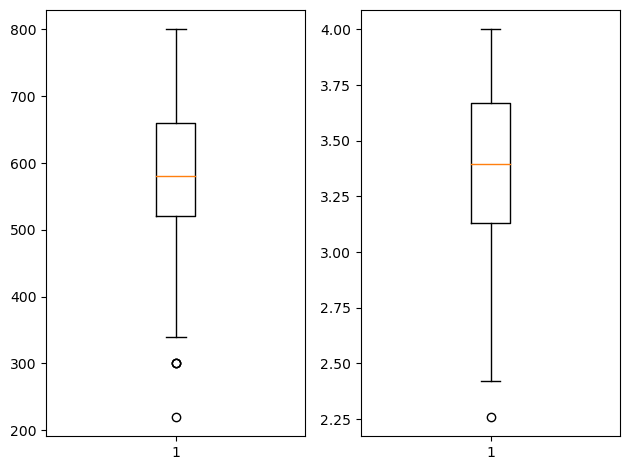

In [8]:
# 2. 이상치(outlier) 처리
# 이상치 확인 방법
#     - boxplot 이용


fig = plt.figure() # 도화지, 여러 그래프를 한 번에 그리고 싶을 때 사용
fig_gre = fig.add_subplot(1, 2, 1)
fig_gpa = fig.add_subplot(1, 2, 2)

fig_gre.boxplot(df['gre'])
fig_gpa.boxplot(df['gpa'])

fig.tight_layout() # layout whwjf
plt.show()

In [27]:
# 이상치 처리
#     - z-score 방식
#     - tukey fences 방식

# 3. 정규화 (필수)


# Training Data Set
x_data = df[['gre', 'gpa', 'rank']].values
t_data = df['admit'].values.reshape(-1, 1)

scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

x_data_norm

array([[0.27586207, 0.77586207, 0.66666667],
       [0.75862069, 0.81034483, 0.66666667],
       [1.        , 1.        , 0.        ],
       ...,
       [0.4137931 , 0.21264368, 0.33333333],
       [0.82758621, 0.79885057, 0.33333333],
       [0.65517241, 0.93678161, 0.66666667]])

## Scikit-learn으로 구현

In [28]:
# sklearn 구현

sklearn_model = linear_model.LogisticRegression()

# model 학습
sklearn_model.fit(x_data, t_data.ravel())

LogisticRegression()

In [29]:
# 예측
sklearn_predict = sklearn_model.predict([[600, 3.8, 1]]) # GRE: 600, GPA: 3.8, RANK: 1
sklearn_predict # 합격

array([1], dtype=int64)

In [30]:
# 확률
sklearn_predict_proba = sklearn_model.predict_proba([[600, 3.8, 1]])
sklearn_predict_proba

array([[0.4308339, 0.5691661]])

## Tensorflow로 구현

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

keras_model = Sequential()
keras_model.add(Flatten(input_shape=(3,)))
keras_model.add(Dense(1, activation='sigmoid'))

keras_model.compile(optimizer=Adam(learning_rate=1e-2),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

keras_model.fit(x_data_norm,
                t_data,
                epochs=1000,
                verbose=1)

# 데이터 양이 충분치 않음

Epoch 1/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.8486 - accuracy: 0.2975
Epoch 2/1000
13/13 [==============================] - 0s 933us/step - loss: 0.7704 - accuracy: 0.3875
Epoch 3/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.7175 - accuracy: 0.5050
Epoch 4/1000
13/13 [==============================] - 0s 1000us/step - loss: 0.6899 - accuracy: 0.5950
Epoch 5/1000
13/13 [==============================] - 0s 916us/step - loss: 0.6760 - accuracy: 0.6650
Epoch 6/1000
13/13 [==============================] - 0s 935us/step - loss: 0.6688 - accuracy: 0.6725
Epoch 7/1000
13/13 [==============================] - 0s 839us/step - loss: 0.6641 - accuracy: 0.6775
Epoch 8/1000
13/13 [==============================] - 0s 910us/step - loss: 0.6606 - accuracy: 0.6800
Epoch 9/1000
13/13 [==============================] - 0s 1000us/step - loss: 0.6572 - accuracy: 0.6800
Epoch 10/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6541 - 

13/13 [==============================] - 0s 1ms/step - loss: 0.5792 - accuracy: 0.7075
Epoch 82/1000
13/13 [==============================] - 0s 911us/step - loss: 0.5795 - accuracy: 0.7050
Epoch 83/1000
13/13 [==============================] - 0s 833us/step - loss: 0.5786 - accuracy: 0.7100
Epoch 84/1000
13/13 [==============================] - 0s 751us/step - loss: 0.5785 - accuracy: 0.7050
Epoch 85/1000
13/13 [==============================] - 0s 931us/step - loss: 0.5784 - accuracy: 0.7050
Epoch 86/1000
13/13 [==============================] - 0s 920us/step - loss: 0.5781 - accuracy: 0.7100
Epoch 87/1000
13/13 [==============================] - 0s 916us/step - loss: 0.5783 - accuracy: 0.7050
Epoch 88/1000
13/13 [==============================] - 0s 838us/step - loss: 0.5781 - accuracy: 0.7050
Epoch 89/1000
13/13 [==============================] - 0s 750us/step - loss: 0.5781 - accuracy: 0.7050
Epoch 90/1000
13/13 [==============================] - 0s 833us/step - loss: 0.5781 - acc

13/13 [==============================] - 0s 946us/step - loss: 0.5761 - accuracy: 0.7075
Epoch 161/1000
13/13 [==============================] - 0s 1000us/step - loss: 0.5752 - accuracy: 0.7100
Epoch 162/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5755 - accuracy: 0.7100
Epoch 163/1000
13/13 [==============================] - 0s 929us/step - loss: 0.5765 - accuracy: 0.7050
Epoch 164/1000
13/13 [==============================] - 0s 833us/step - loss: 0.5751 - accuracy: 0.7050
Epoch 165/1000
13/13 [==============================] - 0s 750us/step - loss: 0.5757 - accuracy: 0.7050
Epoch 166/1000
13/13 [==============================] - 0s 917us/step - loss: 0.5751 - accuracy: 0.7050
Epoch 167/1000
13/13 [==============================] - 0s 917us/step - loss: 0.5751 - accuracy: 0.7050
Epoch 168/1000
13/13 [==============================] - 0s 921us/step - loss: 0.5751 - accuracy: 0.7050
Epoch 169/1000
13/13 [==============================] - 0s 885us/step - loss: 0.

Epoch 239/1000
13/13 [==============================] - 0s 839us/step - loss: 0.5748 - accuracy: 0.7050
Epoch 240/1000
13/13 [==============================] - 0s 912us/step - loss: 0.5746 - accuracy: 0.7075
Epoch 241/1000
13/13 [==============================] - 0s 917us/step - loss: 0.5748 - accuracy: 0.7050
Epoch 242/1000
13/13 [==============================] - 0s 833us/step - loss: 0.5747 - accuracy: 0.7025
Epoch 243/1000
13/13 [==============================] - 0s 834us/step - loss: 0.5748 - accuracy: 0.7025
Epoch 244/1000
13/13 [==============================] - 0s 994us/step - loss: 0.5750 - accuracy: 0.7075
Epoch 245/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5746 - accuracy: 0.7075
Epoch 246/1000
13/13 [==============================] - 0s 941us/step - loss: 0.5746 - accuracy: 0.7075
Epoch 247/1000
13/13 [==============================] - 0s 833us/step - loss: 0.5755 - accuracy: 0.7050
Epoch 248/1000
13/13 [==============================] - 0s 833us/s

13/13 [==============================] - 0s 840us/step - loss: 0.5744 - accuracy: 0.7075
Epoch 318/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5746 - accuracy: 0.7050
Epoch 319/1000
13/13 [==============================] - 0s 917us/step - loss: 0.5749 - accuracy: 0.7100
Epoch 320/1000
13/13 [==============================] - 0s 917us/step - loss: 0.5746 - accuracy: 0.7025
Epoch 321/1000
13/13 [==============================] - 0s 796us/step - loss: 0.5744 - accuracy: 0.7050
Epoch 322/1000
13/13 [==============================] - 0s 834us/step - loss: 0.5749 - accuracy: 0.7050
Epoch 323/1000
13/13 [==============================] - 0s 920us/step - loss: 0.5745 - accuracy: 0.7025
Epoch 324/1000
13/13 [==============================] - 0s 984us/step - loss: 0.5744 - accuracy: 0.7075
Epoch 325/1000
13/13 [==============================] - 0s 998us/step - loss: 0.5750 - accuracy: 0.7050
Epoch 326/1000
13/13 [==============================] - 0s 921us/step - loss: 0.5

13/13 [==============================] - 0s 750us/step - loss: 0.5747 - accuracy: 0.7050
Epoch 397/1000
13/13 [==============================] - 0s 834us/step - loss: 0.5746 - accuracy: 0.7050
Epoch 398/1000
13/13 [==============================] - 0s 833us/step - loss: 0.5747 - accuracy: 0.7050
Epoch 399/1000
13/13 [==============================] - 0s 921us/step - loss: 0.5756 - accuracy: 0.7075
Epoch 400/1000
13/13 [==============================] - 0s 921us/step - loss: 0.5745 - accuracy: 0.7075
Epoch 401/1000
13/13 [==============================] - 0s 840us/step - loss: 0.5753 - accuracy: 0.7025
Epoch 402/1000
13/13 [==============================] - 0s 839us/step - loss: 0.5744 - accuracy: 0.7025
Epoch 403/1000
13/13 [==============================] - 0s 833us/step - loss: 0.5744 - accuracy: 0.7075
Epoch 404/1000
13/13 [==============================] - 0s 917us/step - loss: 0.5746 - accuracy: 0.7075
Epoch 405/1000
13/13 [==============================] - 0s 917us/step - loss: 0

Epoch 475/1000
13/13 [==============================] - 0s 841us/step - loss: 0.5746 - accuracy: 0.7050
Epoch 476/1000
13/13 [==============================] - 0s 860us/step - loss: 0.5746 - accuracy: 0.7075
Epoch 477/1000
13/13 [==============================] - 0s 750us/step - loss: 0.5750 - accuracy: 0.7025
Epoch 478/1000
13/13 [==============================] - 0s 917us/step - loss: 0.5746 - accuracy: 0.7075
Epoch 479/1000
13/13 [==============================] - 0s 833us/step - loss: 0.5744 - accuracy: 0.7075
Epoch 480/1000
13/13 [==============================] - 0s 750us/step - loss: 0.5756 - accuracy: 0.7000
Epoch 481/1000
13/13 [==============================] - 0s 944us/step - loss: 0.5759 - accuracy: 0.7125
Epoch 482/1000
13/13 [==============================] - 0s 753us/step - loss: 0.5742 - accuracy: 0.7075
Epoch 483/1000
13/13 [==============================] - 0s 838us/step - loss: 0.5744 - accuracy: 0.7050
Epoch 484/1000
13/13 [==============================] - 0s 906us

13/13 [==============================] - 0s 916us/step - loss: 0.5747 - accuracy: 0.7050
Epoch 554/1000
13/13 [==============================] - 0s 958us/step - loss: 0.5749 - accuracy: 0.7050
Epoch 555/1000
13/13 [==============================] - 0s 858us/step - loss: 0.5745 - accuracy: 0.7050
Epoch 556/1000
13/13 [==============================] - 0s 922us/step - loss: 0.5746 - accuracy: 0.7025
Epoch 557/1000
13/13 [==============================] - 0s 772us/step - loss: 0.5745 - accuracy: 0.7025
Epoch 558/1000
13/13 [==============================] - 0s 750us/step - loss: 0.5749 - accuracy: 0.7050
Epoch 559/1000
13/13 [==============================] - 0s 919us/step - loss: 0.5747 - accuracy: 0.7050
Epoch 560/1000
13/13 [==============================] - 0s 917us/step - loss: 0.5749 - accuracy: 0.7050
Epoch 561/1000
13/13 [==============================] - 0s 917us/step - loss: 0.5751 - accuracy: 0.7075
Epoch 562/1000
13/13 [==============================] - 0s 856us/step - loss: 0

Epoch 632/1000
13/13 [==============================] - 0s 958us/step - loss: 0.5752 - accuracy: 0.7050
Epoch 633/1000
13/13 [==============================] - 0s 837us/step - loss: 0.5741 - accuracy: 0.7025
Epoch 634/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5752 - accuracy: 0.7050
Epoch 635/1000
13/13 [==============================] - 0s 917us/step - loss: 0.5751 - accuracy: 0.7050
Epoch 636/1000
13/13 [==============================] - 0s 833us/step - loss: 0.5751 - accuracy: 0.7050
Epoch 637/1000
13/13 [==============================] - 0s 917us/step - loss: 0.5744 - accuracy: 0.7050
Epoch 638/1000
13/13 [==============================] - 0s 993us/step - loss: 0.5752 - accuracy: 0.7025
Epoch 639/1000
13/13 [==============================] - 0s 923us/step - loss: 0.5746 - accuracy: 0.7050
Epoch 640/1000
13/13 [==============================] - 0s 948us/step - loss: 0.5748 - accuracy: 0.7050
Epoch 641/1000
13/13 [==============================] - 0s 750us/s

13/13 [==============================] - 0s 942us/step - loss: 0.5751 - accuracy: 0.7050
Epoch 711/1000
13/13 [==============================] - 0s 879us/step - loss: 0.5749 - accuracy: 0.7100
Epoch 712/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5745 - accuracy: 0.7050
Epoch 713/1000
13/13 [==============================] - 0s 840us/step - loss: 0.5750 - accuracy: 0.7050
Epoch 714/1000
13/13 [==============================] - 0s 751us/step - loss: 0.5748 - accuracy: 0.7075
Epoch 715/1000
13/13 [==============================] - 0s 917us/step - loss: 0.5744 - accuracy: 0.7050
Epoch 716/1000
13/13 [==============================] - 0s 920us/step - loss: 0.5748 - accuracy: 0.7075
Epoch 717/1000
13/13 [==============================] - 0s 917us/step - loss: 0.5747 - accuracy: 0.7075
Epoch 718/1000
13/13 [==============================] - 0s 840us/step - loss: 0.5748 - accuracy: 0.7050
Epoch 719/1000
13/13 [==============================] - 0s 752us/step - loss: 0.5

13/13 [==============================] - 0s 834us/step - loss: 0.5747 - accuracy: 0.7050
Epoch 790/1000
13/13 [==============================] - 0s 923us/step - loss: 0.5746 - accuracy: 0.7050
Epoch 791/1000
13/13 [==============================] - 0s 923us/step - loss: 0.5747 - accuracy: 0.7075
Epoch 792/1000
13/13 [==============================] - 0s 838us/step - loss: 0.5745 - accuracy: 0.7075
Epoch 793/1000
13/13 [==============================] - 0s 833us/step - loss: 0.5752 - accuracy: 0.7075
Epoch 794/1000
13/13 [==============================] - 0s 750us/step - loss: 0.5744 - accuracy: 0.7050
Epoch 795/1000
13/13 [==============================] - 0s 922us/step - loss: 0.5748 - accuracy: 0.7075
Epoch 796/1000
13/13 [==============================] - 0s 929us/step - loss: 0.5747 - accuracy: 0.7075
Epoch 797/1000
13/13 [==============================] - 0s 920us/step - loss: 0.5746 - accuracy: 0.7075
Epoch 798/1000
13/13 [==============================] - 0s 841us/step - loss: 0

Epoch 868/1000
13/13 [==============================] - 0s 833us/step - loss: 0.5745 - accuracy: 0.7050
Epoch 869/1000
13/13 [==============================] - 0s 751us/step - loss: 0.5750 - accuracy: 0.7100
Epoch 870/1000
13/13 [==============================] - 0s 838us/step - loss: 0.5746 - accuracy: 0.7075
Epoch 871/1000
13/13 [==============================] - 0s 833us/step - loss: 0.5744 - accuracy: 0.7050
Epoch 872/1000
13/13 [==============================] - 0s 917us/step - loss: 0.5747 - accuracy: 0.7050
Epoch 873/1000
13/13 [==============================] - 0s 750us/step - loss: 0.5763 - accuracy: 0.7075
Epoch 874/1000
13/13 [==============================] - 0s 751us/step - loss: 0.5743 - accuracy: 0.7100
Epoch 875/1000
13/13 [==============================] - 0s 833us/step - loss: 0.5764 - accuracy: 0.7075
Epoch 876/1000
13/13 [==============================] - 0s 928us/step - loss: 0.5743 - accuracy: 0.7125
Epoch 877/1000
13/13 [==============================] - 0s 917us

13/13 [==============================] - 0s 920us/step - loss: 0.5753 - accuracy: 0.7025
Epoch 947/1000
13/13 [==============================] - 0s 960us/step - loss: 0.5747 - accuracy: 0.7000
Epoch 948/1000
13/13 [==============================] - 0s 915us/step - loss: 0.5747 - accuracy: 0.7050
Epoch 949/1000
13/13 [==============================] - 0s 838us/step - loss: 0.5746 - accuracy: 0.7050
Epoch 950/1000
13/13 [==============================] - 0s 833us/step - loss: 0.5745 - accuracy: 0.7050
Epoch 951/1000
13/13 [==============================] - 0s 917us/step - loss: 0.5745 - accuracy: 0.7050
Epoch 952/1000
13/13 [==============================] - 0s 917us/step - loss: 0.5744 - accuracy: 0.7050
Epoch 953/1000
13/13 [==============================] - 0s 918us/step - loss: 0.5746 - accuracy: 0.7025
Epoch 954/1000
13/13 [==============================] - 0s 756us/step - loss: 0.5743 - accuracy: 0.7075
Epoch 955/1000
13/13 [==============================] - 0s 863us/step - loss: 0

In [37]:
my_data = np.array([600, 3.8, 1])

keras_result = keras_model.predict(scaler.transform(my_data.reshape(-1,3)))
keras_result

1/1 [==============================] - 0s 81ms/step


array([[0.5827733]], dtype=float32)

In [42]:
list = [1, 2, 3, 4, 4, 5, 5, 6, 8]
list.remove(4)
list

[1, 2, 3, 4, 5, 5, 6, 8]